In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.pipeline import Pipeline

from common import OutlierRemover, plot_decomposed_features_3d

In [2]:
rng = np.random.RandomState(42)

In [3]:
df_wine = pd.read_csv('data/winequality-white (2).csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
N_DIMS = 3

pipe_stages = [
    ('outlier', OutlierRemover()),
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('scaler', QuantileTransformer(output_distribution='normal')),
    ('pca', PCA(n_components=10)),
]

pipe = Pipeline(pipe_stages)

X_processed = pipe.fit_transform(df_wine.drop(columns='quality'))

In [5]:
cluster = KMeans(n_clusters=7, random_state=rng)
# cluster = AgglomerativeClustering(n_clusters=7)

c:\Users\Adam\anaconda3\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


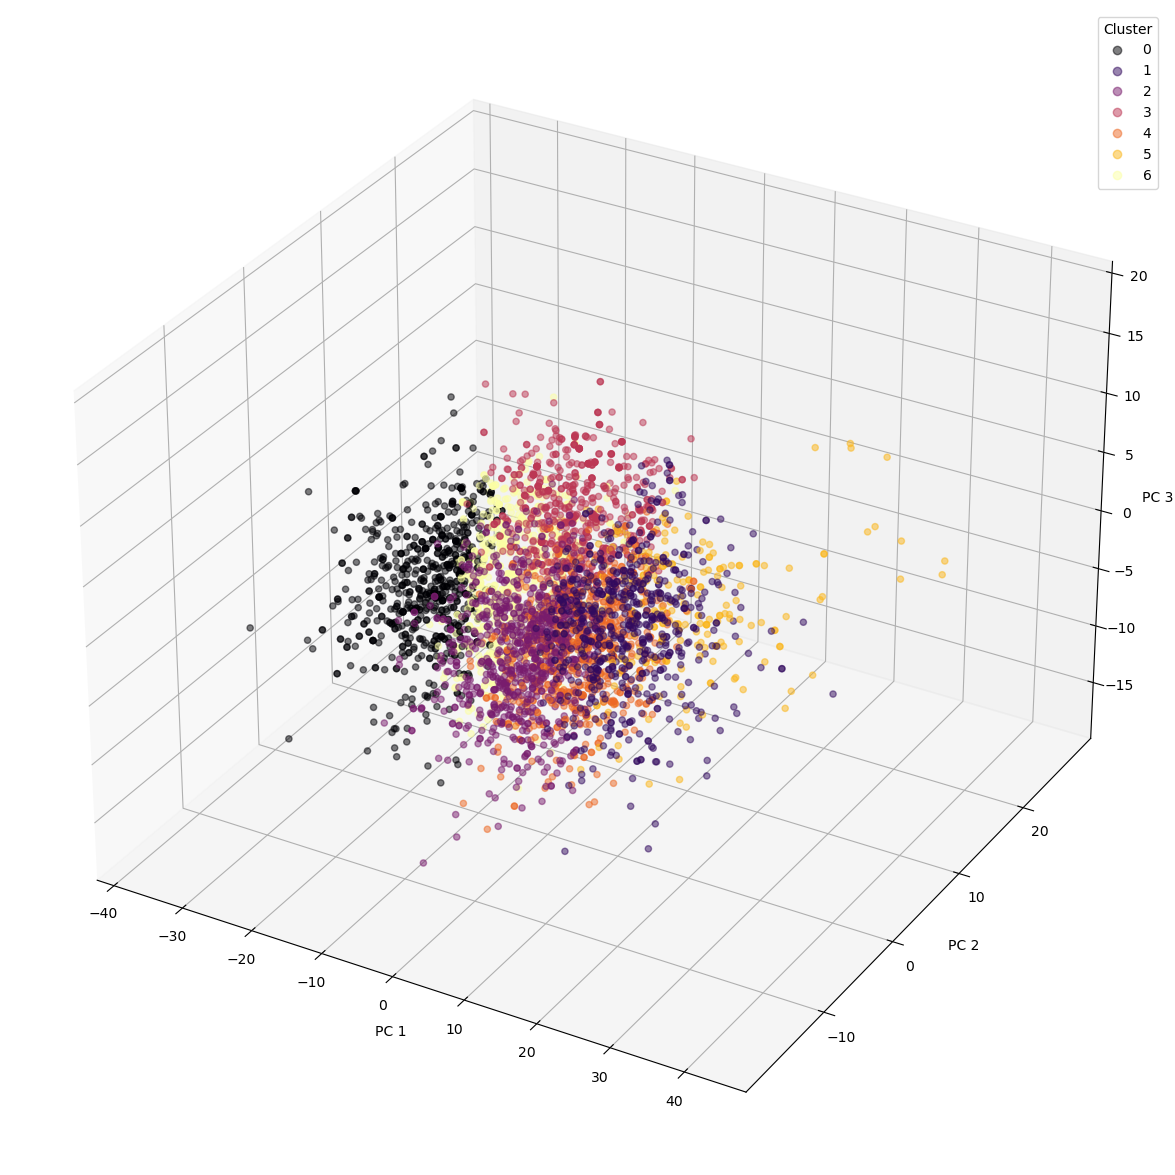

In [6]:
plot_decomposed_features_3d(
    PCA(N_DIMS).fit_transform(X_processed),
    pd.Series(cluster.fit_predict(X_processed), name='Cluster'),
    fig_labels='PC',
)